# Assignment 4
You have to replicate all the maps in this JN using folium.

In [25]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }a
</style>
"""))


In [32]:
import matplotlib.pyplot as plt 
# ! pip install geopandas
import numpy as np
import pandas as pd
import geopandas as gpd

In [28]:
# Get data of labor
sex_work = pd.read_stata( 'C:/Users/LENOVO/Desktop/Github/QLAB_Summer_Python/_data/8_trab_sex_20.dta' )
sex_work[ 'dpt_code' ] = sex_work.cod_ubigeo.str[ :2 ].copy()
sex_work[ 'prov_code' ] = sex_work.cod_ubigeo.str[ :4 ].copy()

# Sex work
women_work = sex_work[ sex_work.sex == 'Mujer' ].copy().reset_index( drop = True )

In [29]:
# get data from lima
women_work[ 'month' ] = pd.to_datetime( women_work.month , format = '%B' ) \
                                    .dt.strftime( '%m' ) \
                                    .astype( int )

In [30]:
# Sort by department and month
women_work.sort_values([ 'dpt_code', 'month'], inplace = True )

# Get the total number of women workers by dpt
dpt_women_work = women_work.groupby( [ 'dpt_code', 'month'], as_index = False )[['empl']] \
                            .sum() \
                            .rename( columns = {'empl' :'women_empl'})

# Sort by dpt code and month
dpt_women_work.sort_values([ 'dpt_code', 'month'], inplace = True )

In [31]:
df2 = dpt_women_work.groupby( ['dpt_code'],as_index = False )[['women_empl']].mean()

## Shapefile

In [33]:
dpt_shp = gpd.read_file( 'C:/Users/LENOVO/Desktop/Github/QLAB_Summer_Python/_data/INEI_LIMITE_DEPARTAMENTAL\INEI_LIMITE_DEPARTAMENTAL.shp' )

In [34]:
df3 = dpt_shp.merge( df2, left_on = 'CCDD', right_on = 'dpt_code'  )

<Axes: >

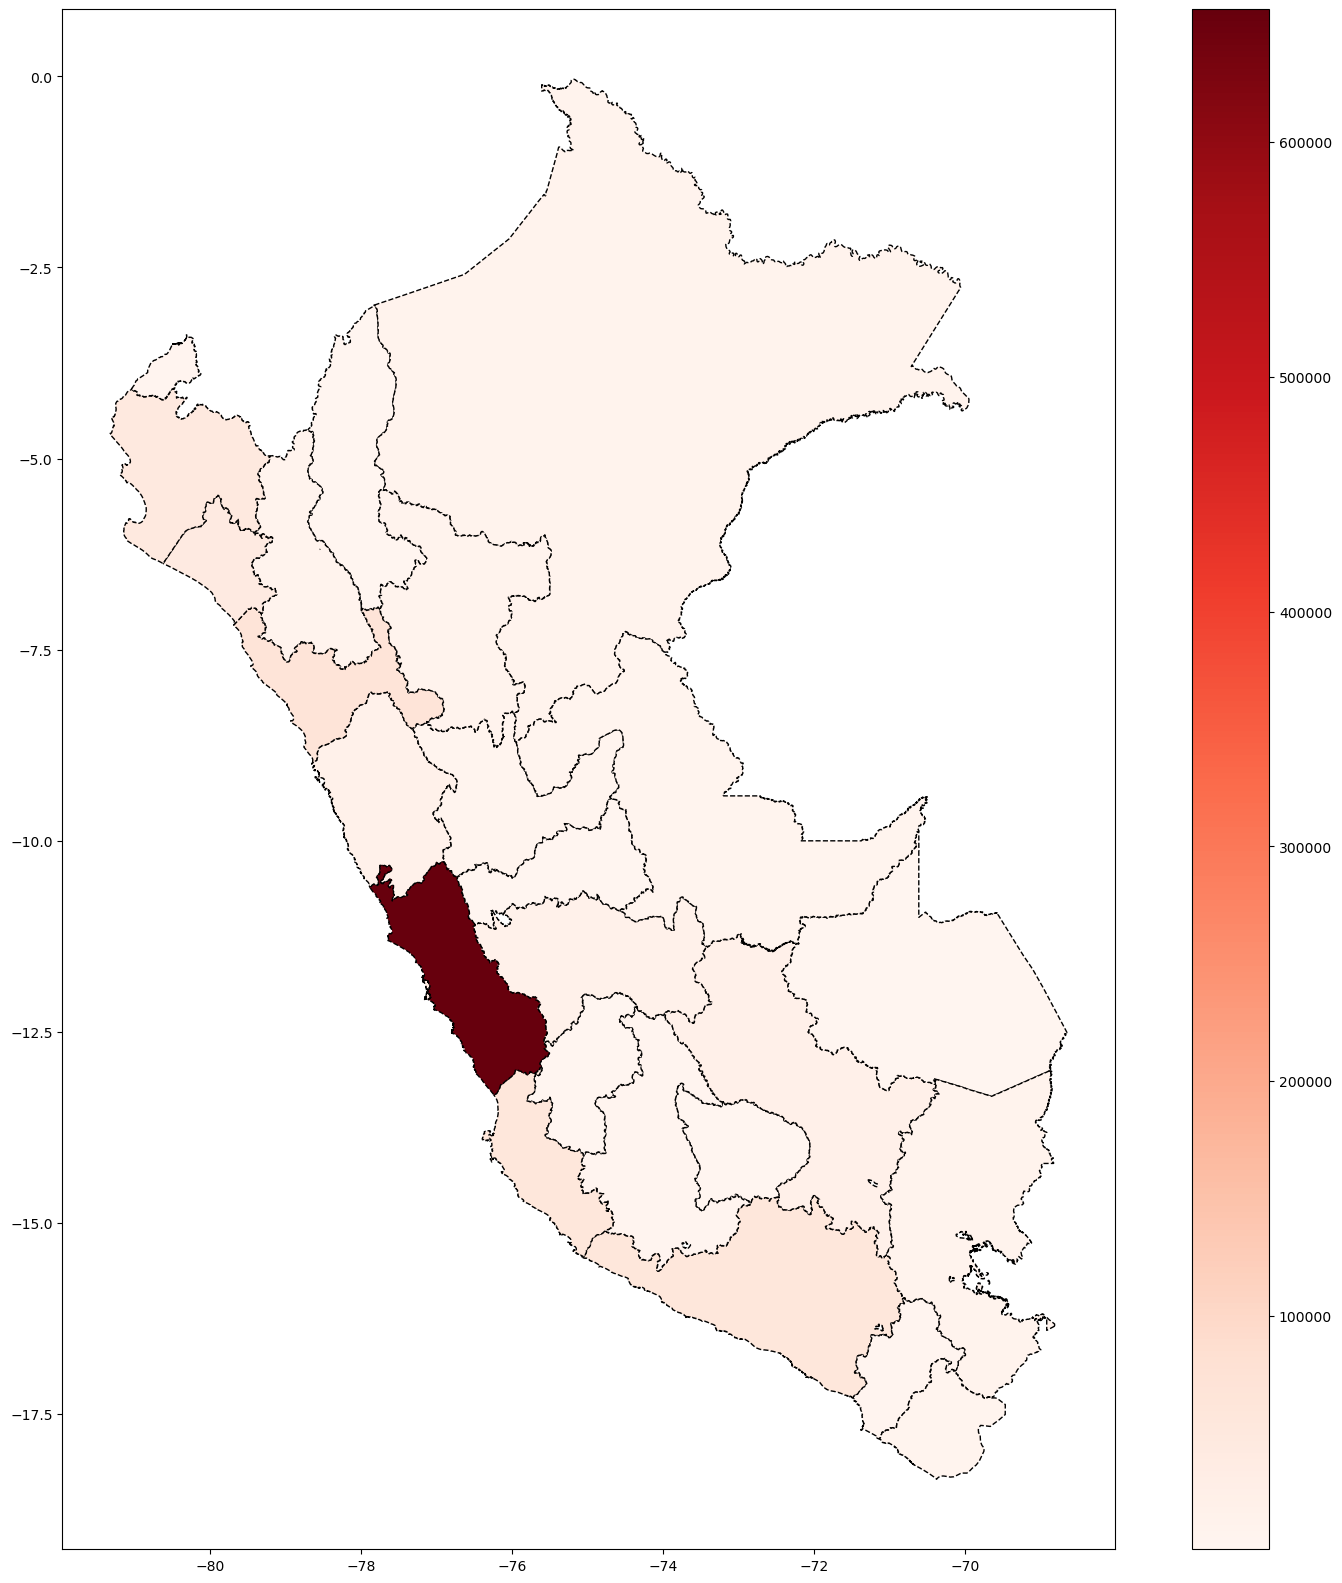

In [35]:
df3.plot( column='women_empl', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True)

<AxesSubplot:>

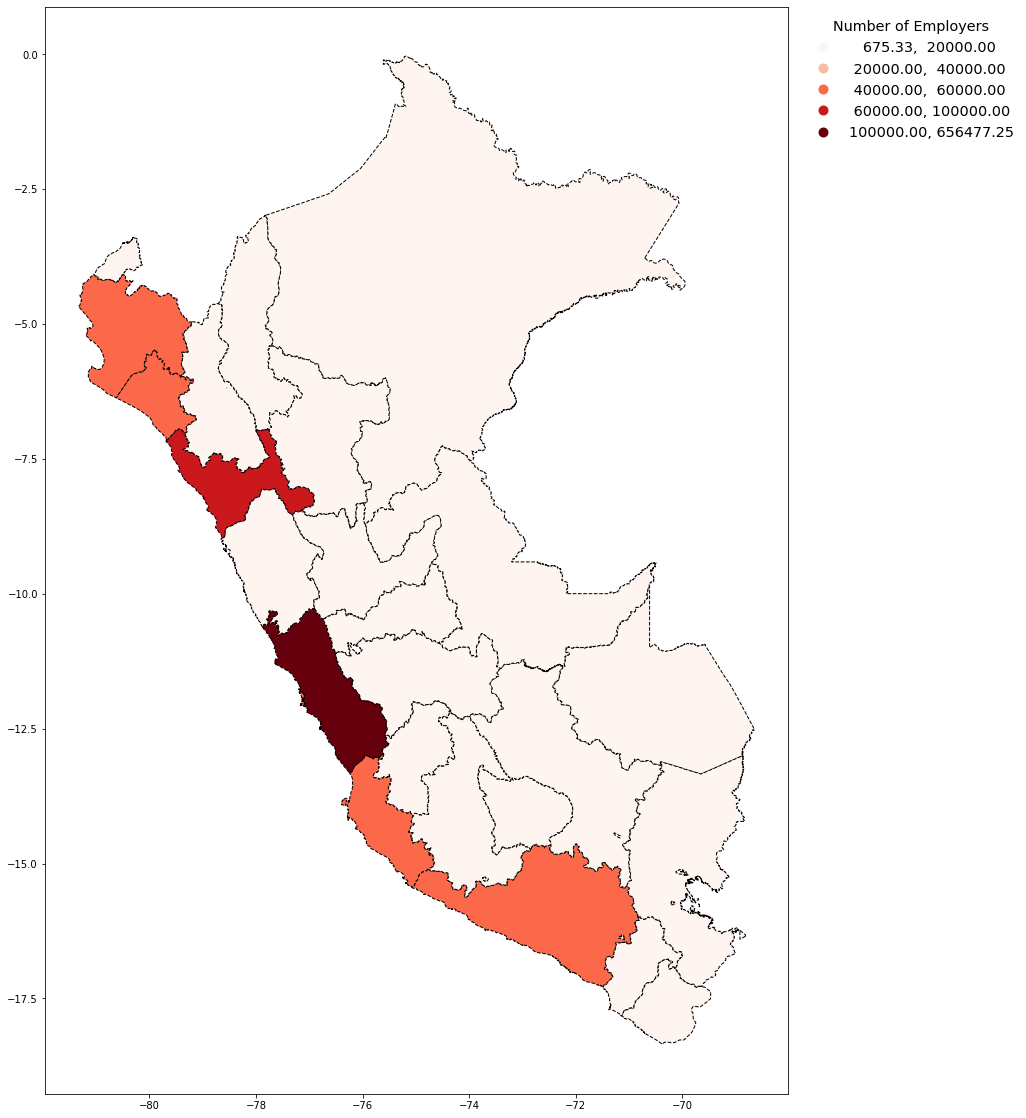

In [10]:
fig, ax = plt.subplots(figsize=(20, 20))
df3.plot( ax = ax, 
        column='women_empl', 
         cmap= 'Reds', 
         figsize=(20, 20), 
         linestyle='--',
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined", 
         classification_kwds = dict( bins = [ 20000, 40000, 60000, 100000  ] ), 
         legend_kwds = dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Number of Employers", 
                            title_fontsize = 'x-large', 
                            frameon= False )
        )


<AxesSubplot:>

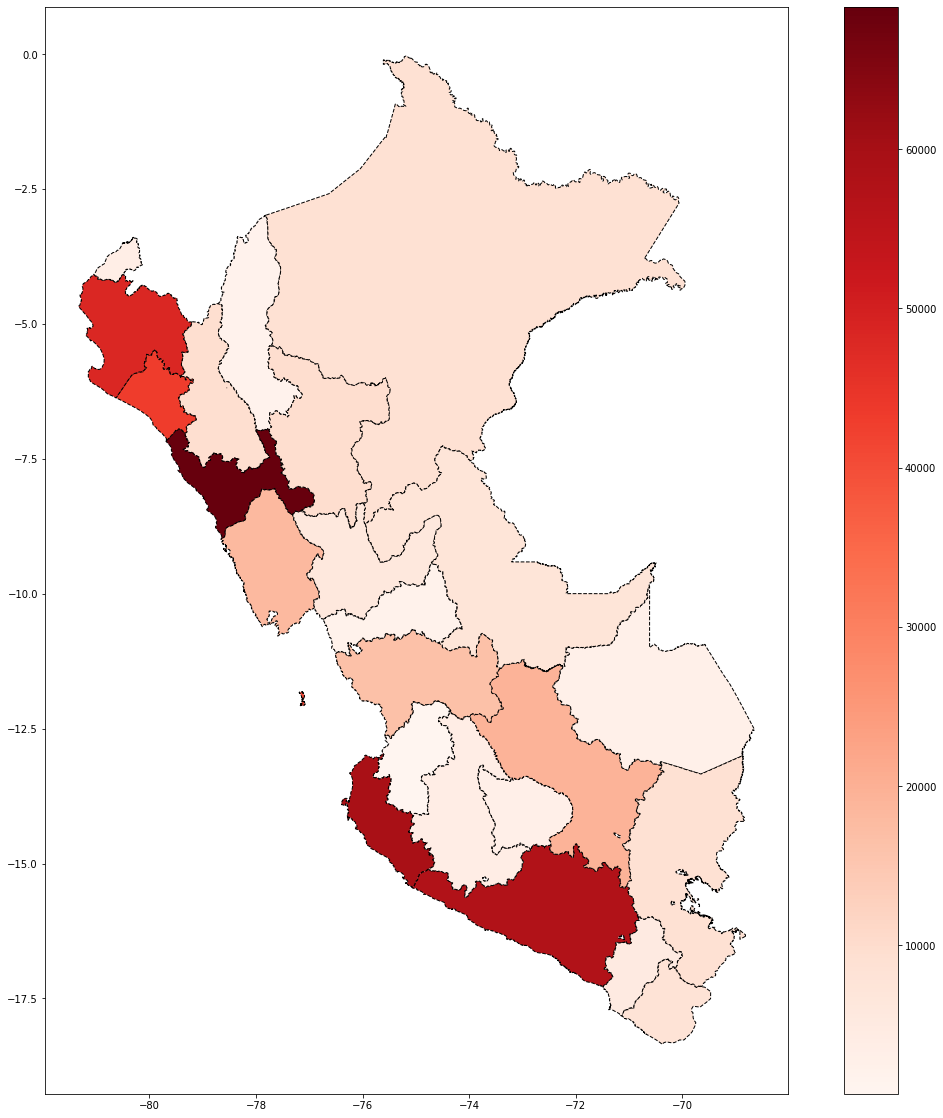

In [69]:
df3[ df3.CCDD != "15" ].plot( column='women_empl', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True)

In [70]:
df4 = sex_work.groupby( ['dpt_code', 'month', 'sex'], as_index = False )[['empl']].sum() \
        .pivot( index = [ 'dpt_code', 'month' ] , columns = 'sex',values='empl') \
        .reset_index()

In [71]:
df4

sex,dpt_code,month,S.I.,Hombre,Mujer
0,01,January,472,5108,2043
1,01,February,441,4951,2059
2,01,March,423,4459,2056
3,01,April,314,3211,1811
4,01,May,297,3049,1642
...,...,...,...,...,...
295,25,August,1654,16885,7425
296,25,September,1689,17886,7549
297,25,October,1812,19223,7751
298,25,November,1882,19758,7933


In [72]:
df4[ 'prop_wom' ] = ( df4.Mujer * 100 / df4.Hombre )

In [73]:
df5 = dpt_shp.merge( df4, left_on = 'CCDD', right_on = 'dpt_code'  )

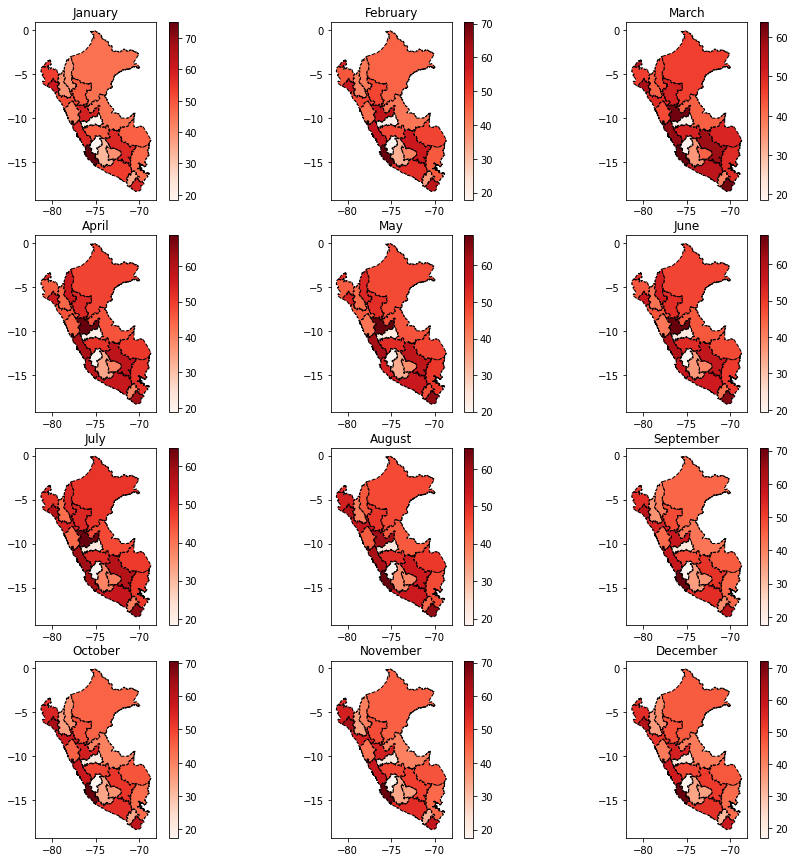

In [15]:
fig, axis = plt.subplots( nrows = 4, ncols= 3, figsize = ( 15, 15 ) )

idx = 0
for i in range( 4 ):
    for j in range ( 3 ):
        
        
        ax = axis[ i ][ j ]
        
        month = df5.month.unique()[ idx ]
        
        df6 = df5[ df5.month == month ]
        
        df6.plot( column='prop_wom', 
                  cmap='Reds', 
                  linestyle='--',
                  edgecolor='black', 
                  legend = True, 
                  ax = ax 
                )
        
        ax.set_title( month )
        
        idx = idx + 1

In [74]:
from textwrap import wrap

In [75]:
# Inverting colour map
cmap = plt.cm.OrRd

<AxesSubplot:>

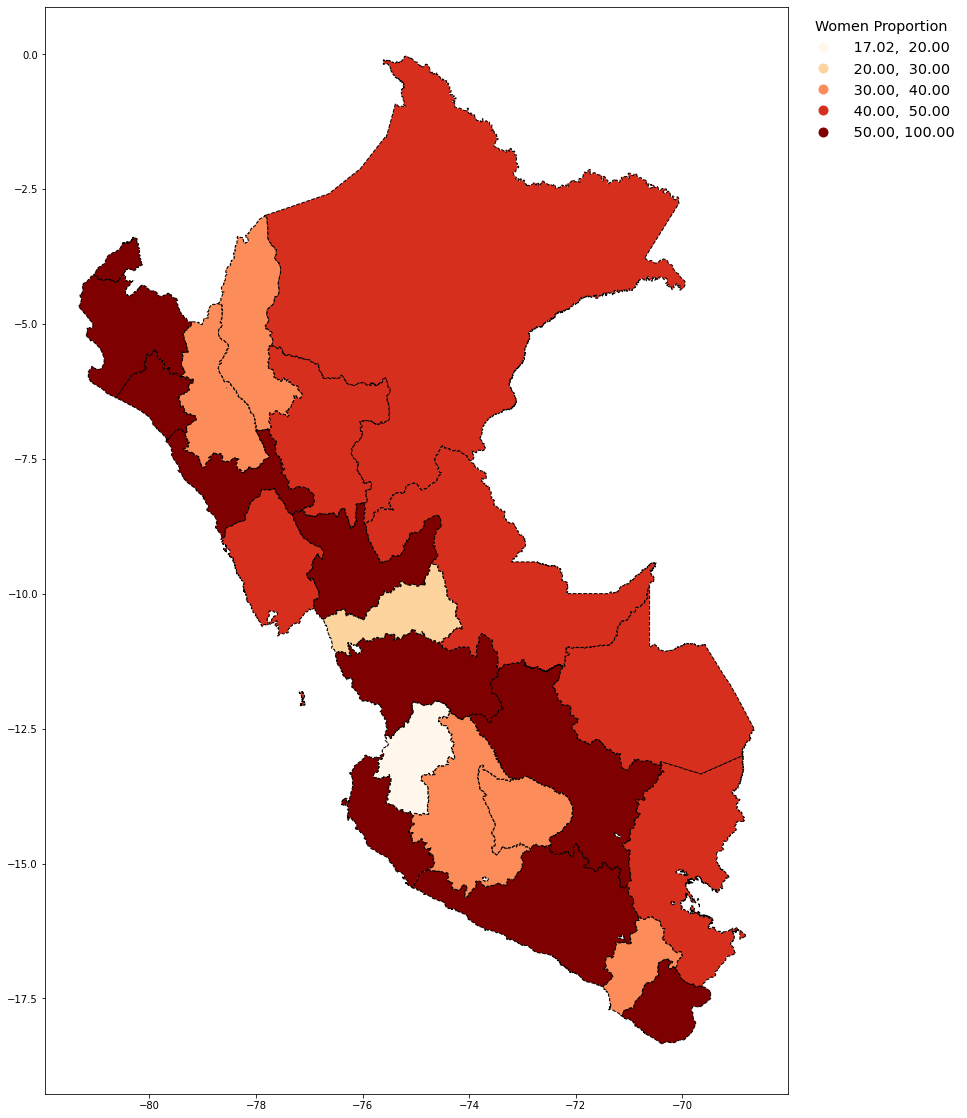

In [76]:
fig, ax = plt.subplots(figsize=(20, 20))
df6.plot( ax = ax, 
        column='prop_wom', 
         cmap= cmap, 
         figsize=(20, 20), 
         linestyle='--',
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined", 
         classification_kwds = dict( bins = [ 20, 30, 40, 50,  100 ] ), 
         legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Women Proportion", 
                            title_fontsize = 'x-large', 
                            frameon= False )
        )


In [77]:
df6.loc[ (df6.NOMBDEP == 'LIMA'), 'prop_wom' ] = np.nan

<AxesSubplot:>

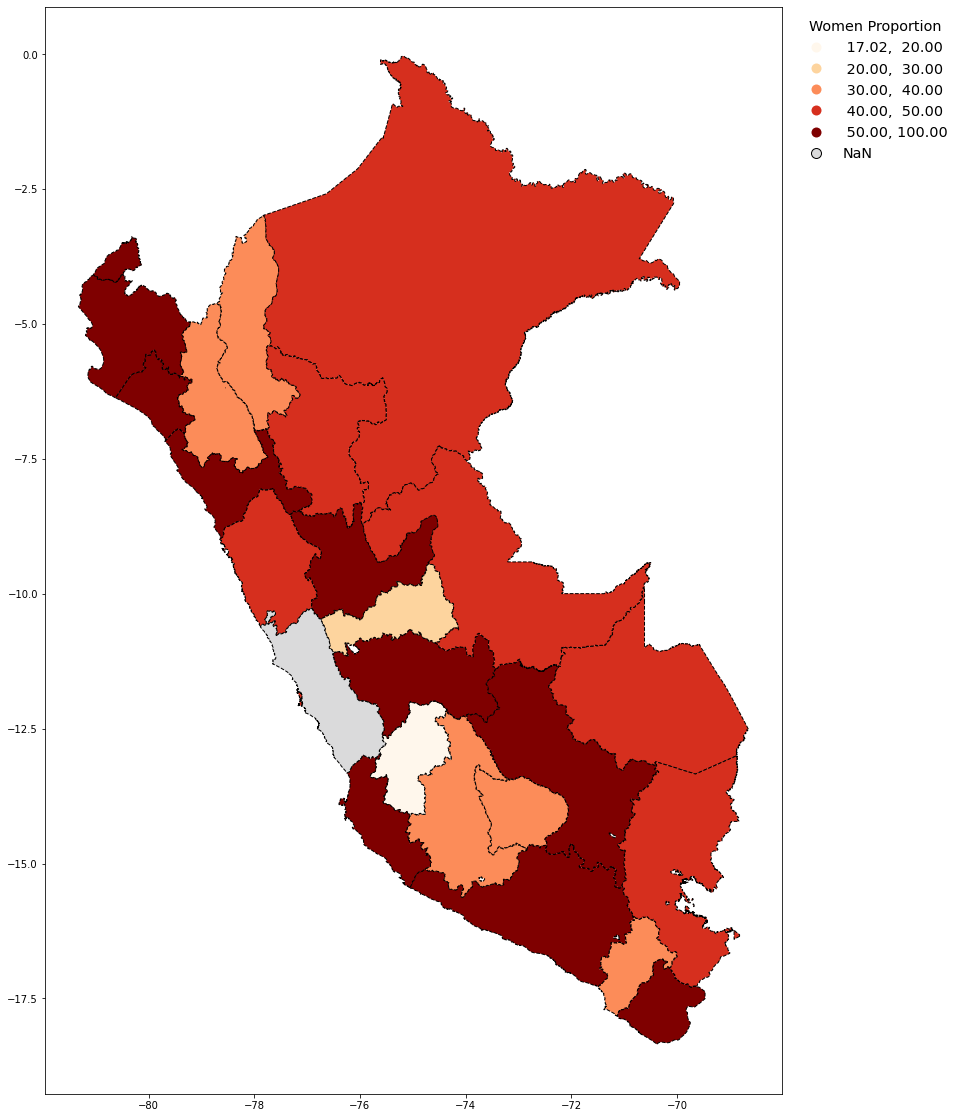

In [20]:
fig, ax = plt.subplots(figsize=(20, 20))
df6.plot( ax = ax, 
        column='prop_wom', 
         cmap= cmap, 
         figsize=(20, 20), 
         linestyle='--',
         edgecolor='black', 
         legend = True,  
         scheme = "User_Defined", 
         missing_kwds= dict(color = "#DADADB",), 
         classification_kwds = dict( bins = [ 20, 30, 40, 50,  100 ] ), 
         legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Women Proportion", 
                            title_fontsize = 'x-large', 
                            frameon= False )
        )

<AxesSubplot:>

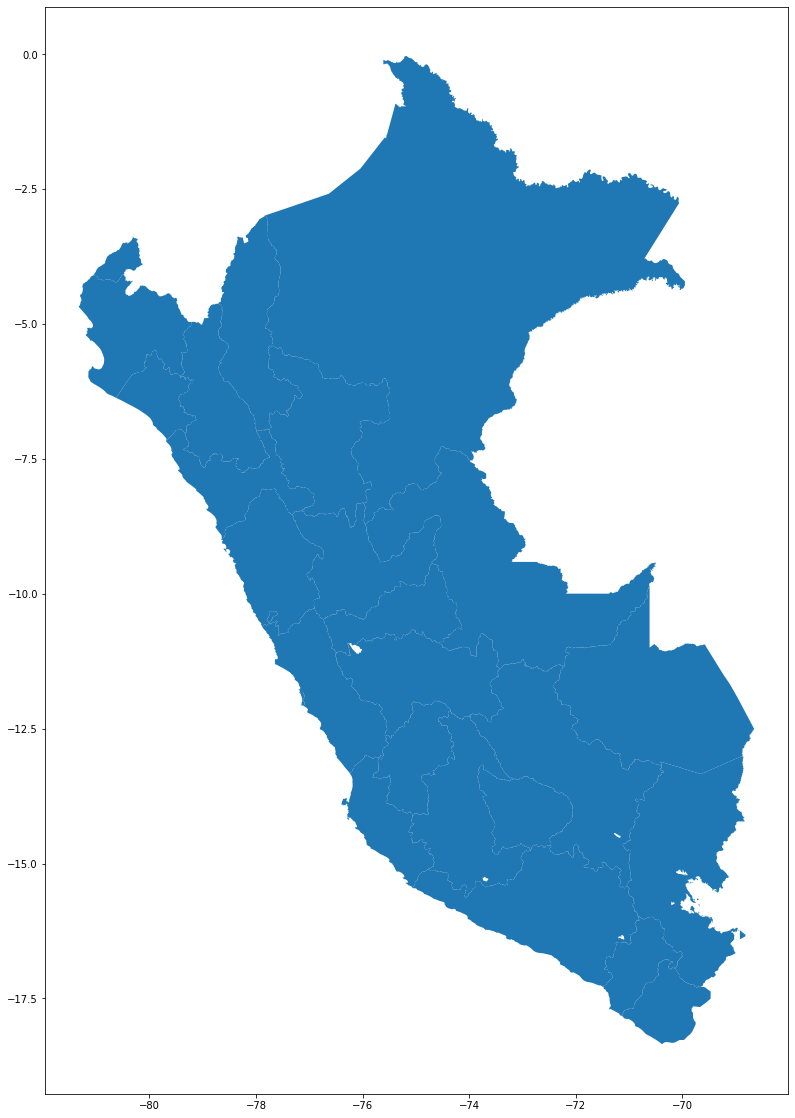

In [21]:
fig, ax = plt.subplots(figsize=(20, 20))
dpt_shp.plot( ax = ax )

In [22]:
dpt_shp['country'] = 'PERU'

In [23]:
ctr_shp = dpt_shp.dissolve( by = 'country')

<AxesSubplot:>

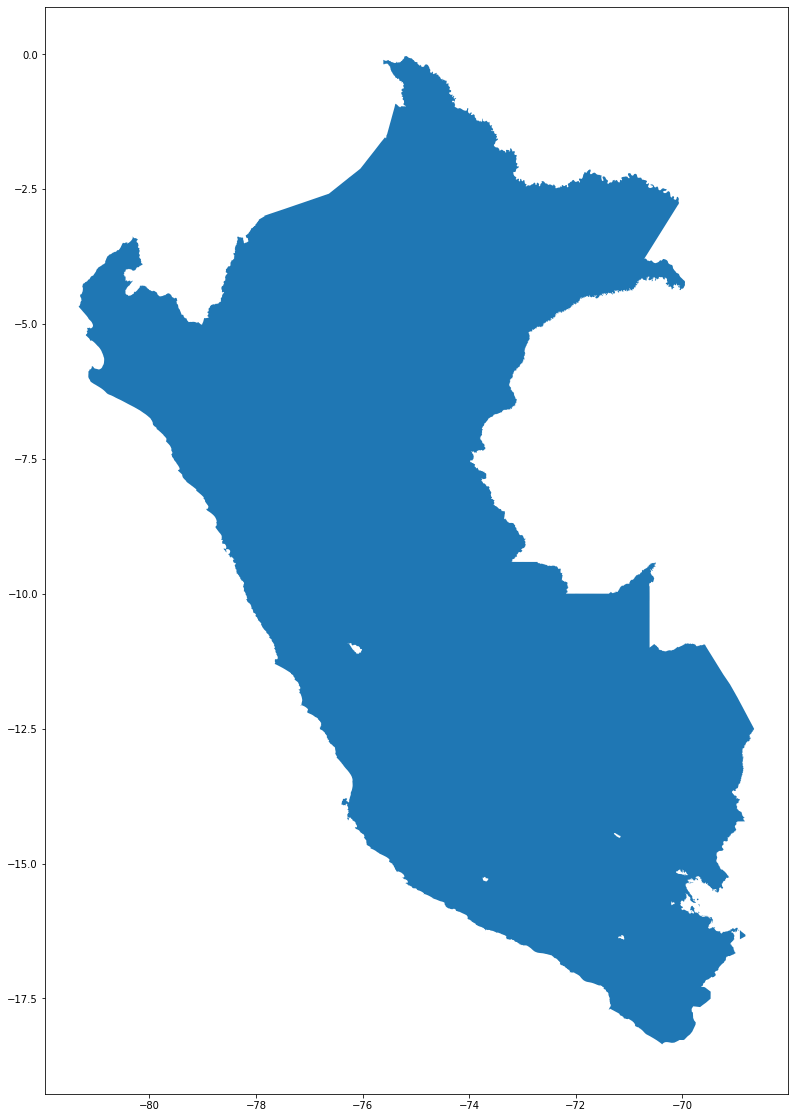

In [24]:
fig, ax = plt.subplots(figsize=(20, 20))
ctr_shp.plot( ax = ax )